In [7]:
import pandas as pd                   
import numpy as np   

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# 1. Exploratory data analysis 

Prior to deadling with the csv dataset in Pandas, we noticed that the original xls file contained decimal values where the separator was a comma (,) not a dot (.), so we directly converted these commas to dot in order to properly load it into the jynb file. The modified file is called 'measures_1.csv'. 

In [10]:
dataset_1 = pd.read_csv('measures_1a.csv')
dataset_1.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN


# 1.1. Data description 

In [11]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   gas_type       388 non-null    object 
 6   AC             388 non-null    int64  
 7   rain           388 non-null    int64  
 8   sun            388 non-null    int64  
 9   refill liters  13 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 30.4+ KB


In [12]:
num = dataset_1.select_dtypes(include=np.number)
num

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
0,28.0,5.0,26,21.5,12,0,0,0,45.0
1,12.0,4.2,30,21.5,13,0,0,0,NaN
2,11.2,5.5,38,21.5,15,0,0,0,NaN
3,12.9,3.9,36,21.5,14,0,0,0,NaN
4,18.5,4.5,46,21.5,15,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,NaN
384,16.1,4.3,38,25.0,31,1,0,0,NaN
385,16.0,3.8,45,25.0,19,0,0,0,NaN
386,15.4,4.6,42,25.0,31,1,0,0,NaN


In [13]:
cat = dataset_1.select_dtypes(exclude=np.number)
cat

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
...,...
383,SP98
384,SP98
385,SP98
386,SP98


In [14]:
for column in cat.columns:
    unique_values = cat[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'gas_type': ['E10' 'SP98']


In [15]:
dataset_1.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


There are also some NaN values in the dataset, in order to deal with it for the machine learning model, we will replace NaN with the median in the numerical dataset and NaN with the mode in the categorical dataset in order to have an initially 'clean' datasource. 

# 1.2. Data cleaning

1. replace NaN values in the numerical dataset with the median

In [16]:
num_2 = num.fillna(num.median())

print("\nDataset after median imputation:")
num_2.info()


Dataset after median imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   AC             388 non-null    int64  
 6   rain           388 non-null    int64  
 7   sun            388 non-null    int64  
 8   refill liters  388 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 27.4 KB


2. replace NaN values in the numerical dataset with the mode

In [17]:
cat_2 = cat.fillna(cat.mode().iloc[0])

cat_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gas_type  388 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [18]:
num_2.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.931701,11.358247,0.077320,0.123711,0.082474,37.970361
std,22.667837,1.033172,13.598524,0.994741,6.991542,0.267443,0.329677,0.275441,1.520514
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,38.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,38.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [37]:
dataset_1A = pd.concat([num_2, cat_2], axis=1)
dataset_1A.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,gas_type
0,28.0,5.0,26,21.5,12,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,0,0,0,38.0,E10
2,11.2,5.5,38,21.5,15,0,0,0,38.0,E10
3,12.9,3.9,36,21.5,14,0,0,0,38.0,E10
4,18.5,4.5,46,21.5,15,0,0,0,38.0,E10


dataset_1A.to_csv('dataset_1A.csv', index=False)

# 1.3. Data representation 

# 1.3. a) grouped data - average distance and consumption 

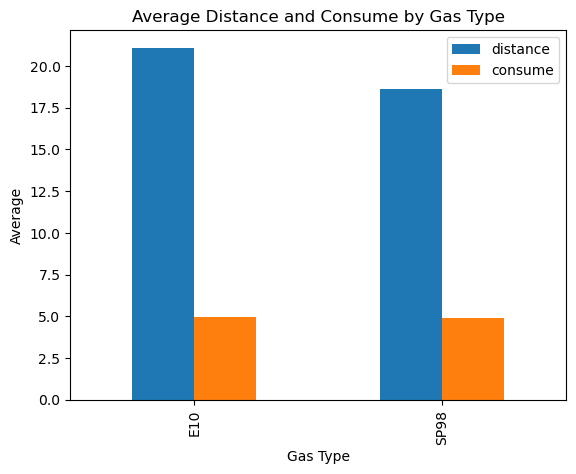

In [38]:
grouped_data = dataset_1A.groupby('gas_type')[['distance', 'consume']].mean()

grouped_data.plot(kind='bar')

plt.xlabel('Gas Type')
plt.ylabel('Average')
plt.title('Average Distance and Consume by Gas Type')

plt.show()

From our barplot it looks like E10 fuel-type allows driving for longer distances on average (20 km+) compared to unleaded fuel (SP98). Consumption averages a rate of 5 litres per 100 kilometers. 

# 1.3. b) grouped data - total distance and consumption 

In [39]:
# average distance by gas type
average_distance = dataset_1A.groupby('gas_type')['distance'].mean()

# average consume by gas type
average_consume = dataset_1A.groupby('gas_type')['consume'].mean()

print("Average Distance by Gas Type:")
print(average_distance)

print("\nAverage Consume by Gas Type:")
print(average_consume)

Average Distance by Gas Type:
gas_type
E10     21.096250
SP98    18.639912
Name: distance, dtype: float64

Average Consume by Gas Type:
gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64


In [40]:
# total distance by gas type
total_distance = dataset_1A.groupby('gas_type')['distance'].sum()

print("Total Distance by Gas Type:")
print(total_distance)

Total Distance by Gas Type:
gas_type
E10     3375.4
SP98    4249.9
Name: distance, dtype: float64


In [41]:
# total distance by gas type
total_distance = dataset_1A.groupby('gas_type')['distance'].sum()

# total fuel consumption
total_consumption = (total_distance / 100) * dataset_1A.groupby('gas_type')['consume'].mean()

print("Total Fuel Consumption by Gas Type:")
print(total_consumption)

Total Fuel Consumption by Gas Type:
gas_type
E10     166.449412
SP98    208.207820
dtype: float64


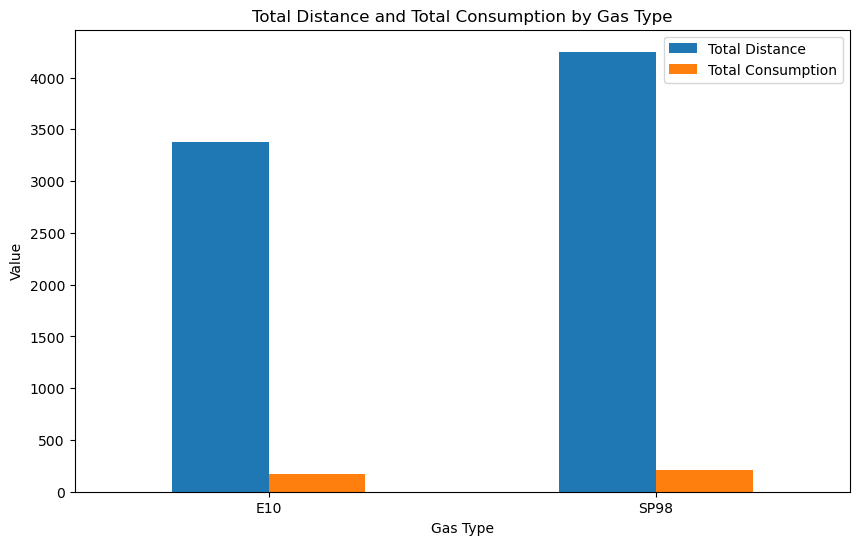

<Figure size 640x480 with 0 Axes>

In [42]:
# total distance by gas type
total_distance_by_gas = dataset_1A.groupby('gas_type')['distance'].sum()

# total fuel consumption
total_consumption = (total_distance / 100) * dataset_1A.groupby('gas_type')['consume'].mean()

summary_df = pd.DataFrame({
    'Total Distance': total_distance_by_gas,
    'Total Consumption': total_consumption
})

ax = summary_df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Value')
ax.set_xlabel('Gas Type')
ax.set_title('Total Distance and Total Consumption by Gas Type')
plt.xticks(rotation=0)
plt.show()

for idx, row in summary_df.iterrows():
    ax.text(idx, row['Total Distance'], f"{row['Total Distance']:.2f}", ha='center', va='bottom')
    ax.text(idx, row['Total Consumption'], f"{row['Total Consumption']:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

We observe that 'specials', which refers to the driving conditions, has some repeated values, such as "AC sun" and "AC Sun" (same values with one case of difference), "ac" and "AC", "AC sun" and "Sun ac". 

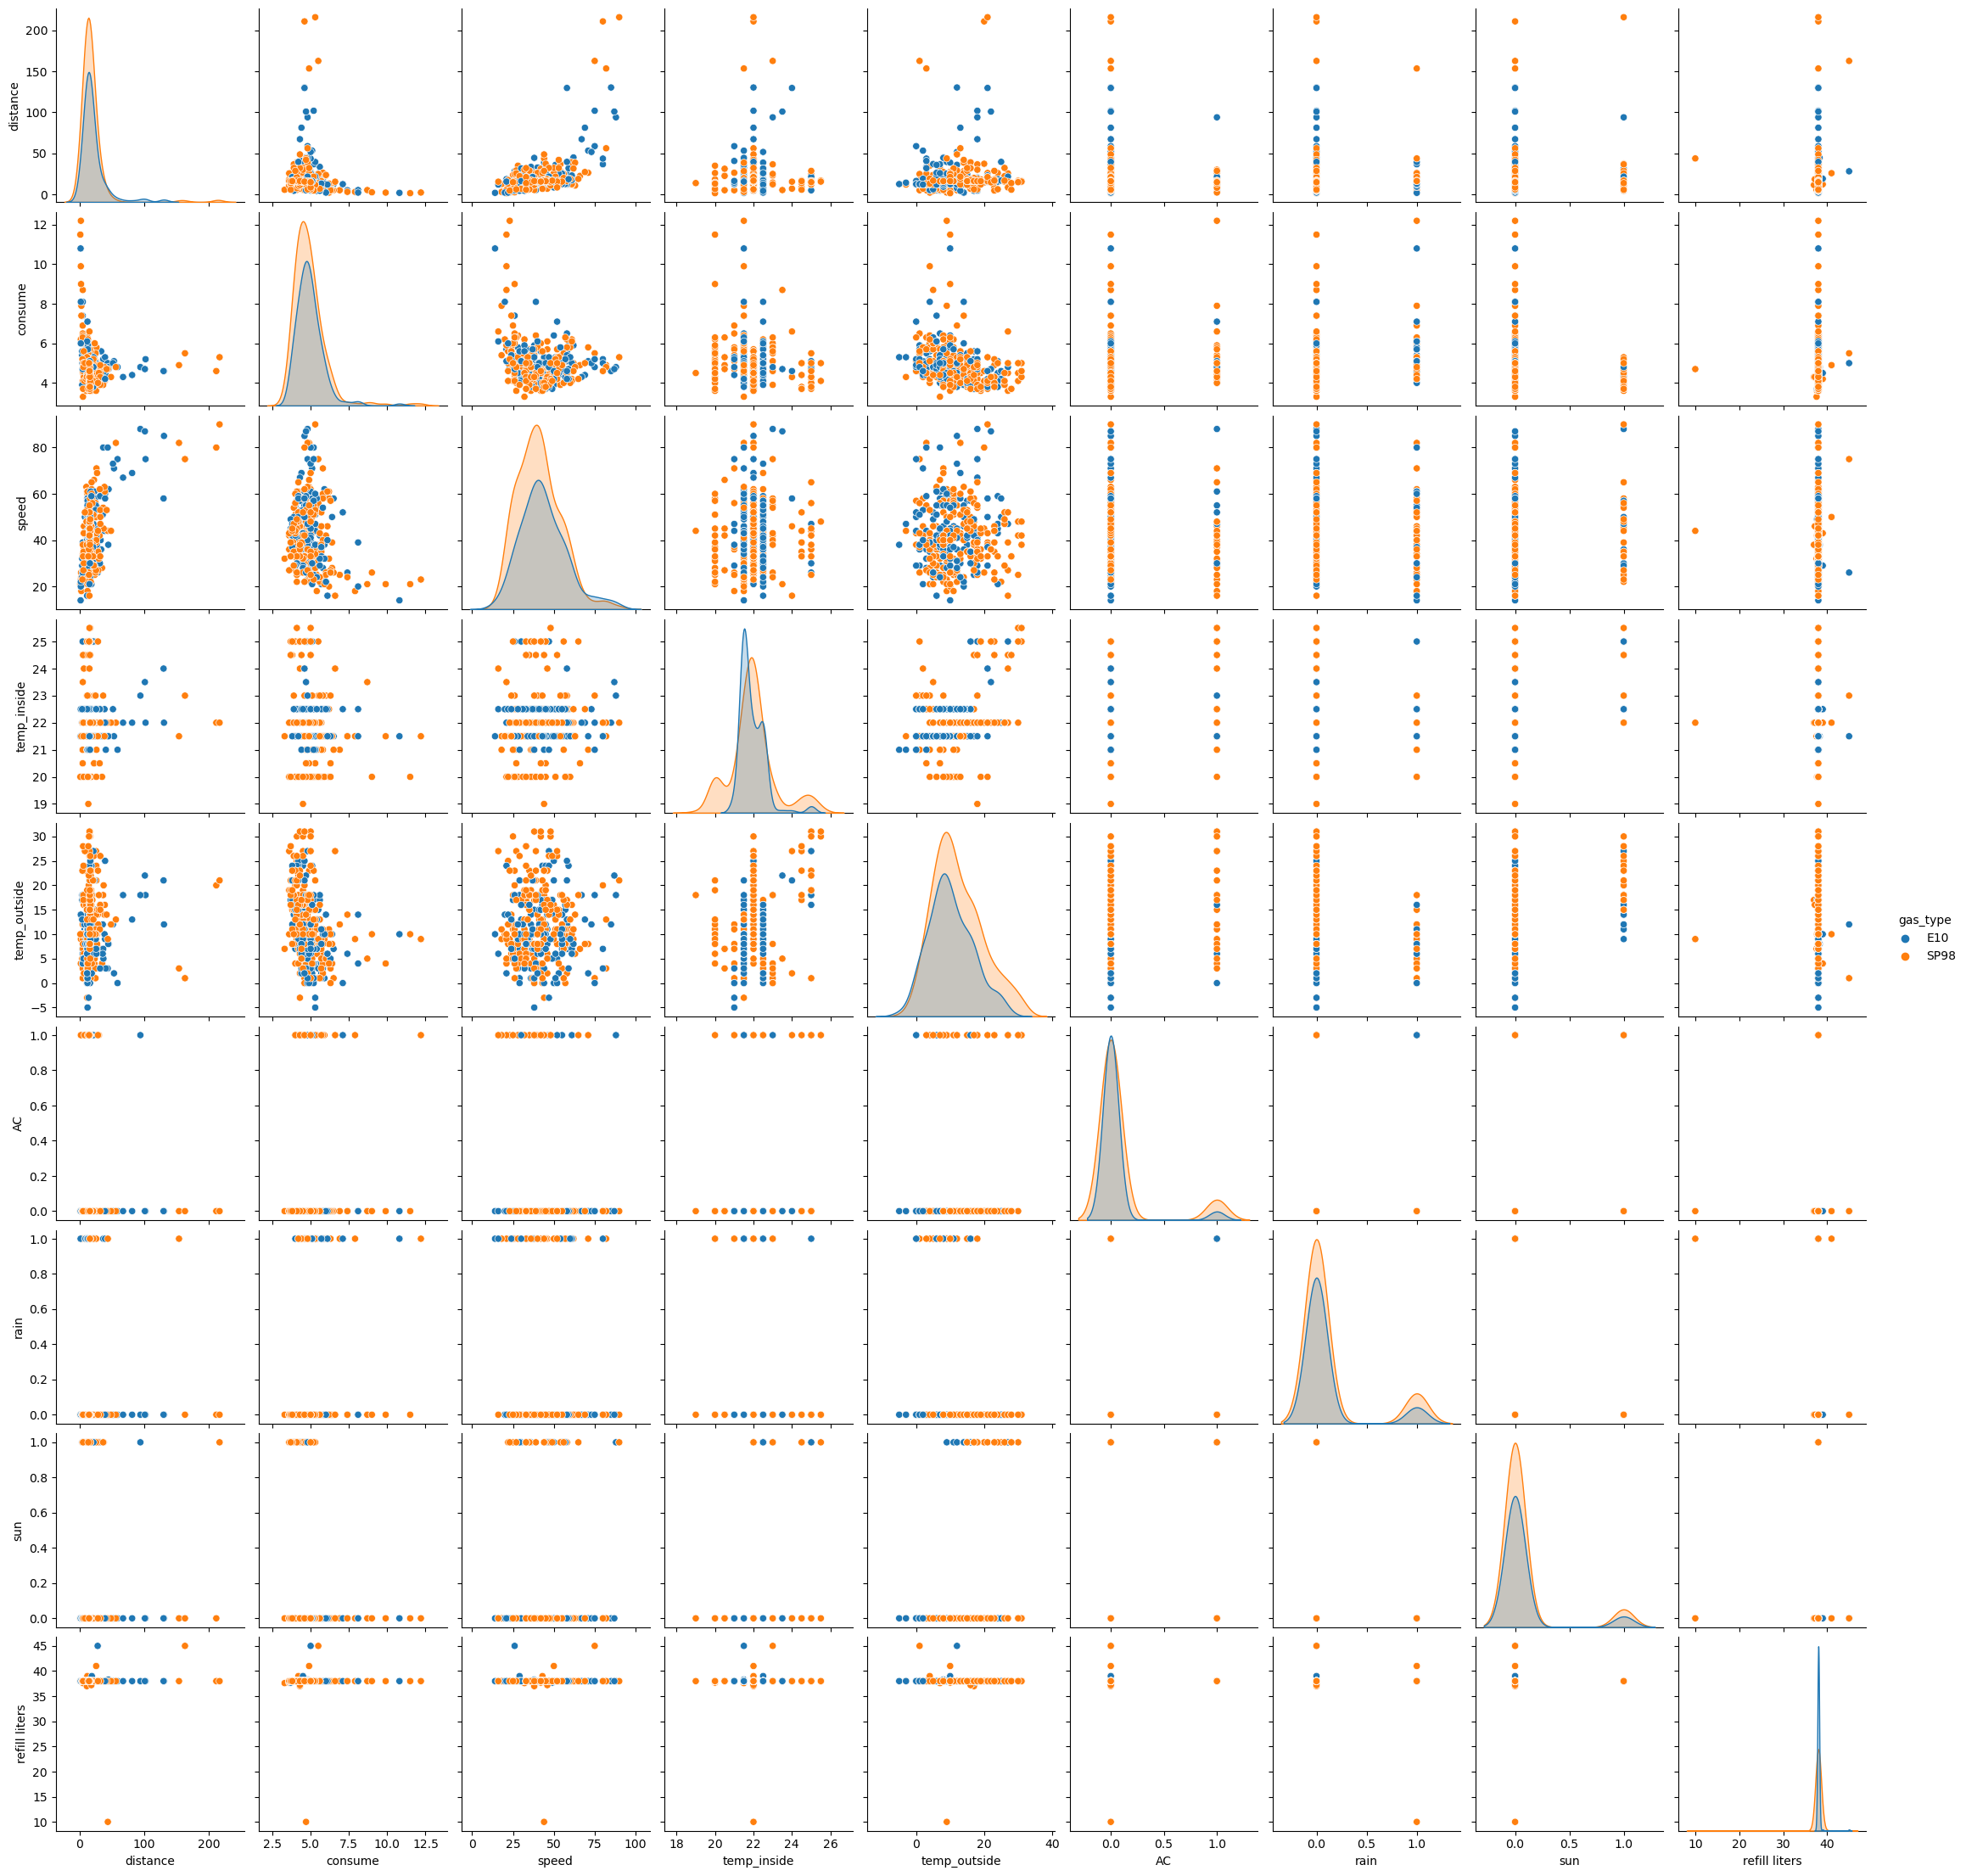

In [43]:
sns.pairplot(dataset_1A, hue='gas_type', diag_kind='kde')

plt.show()

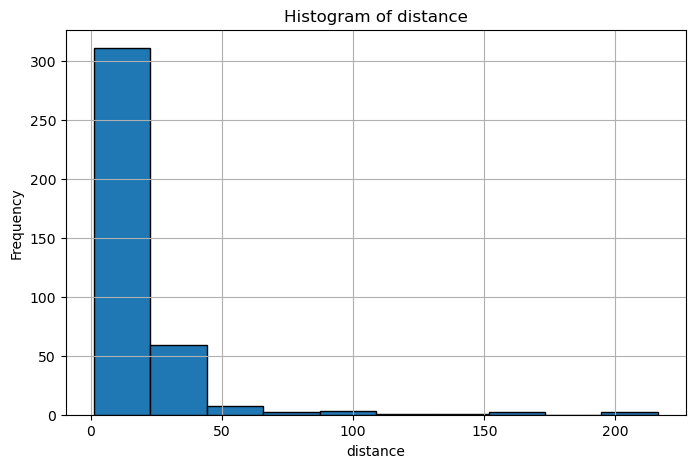

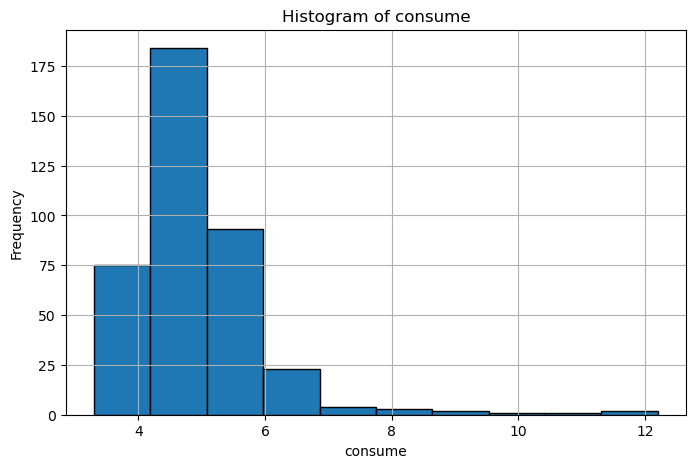

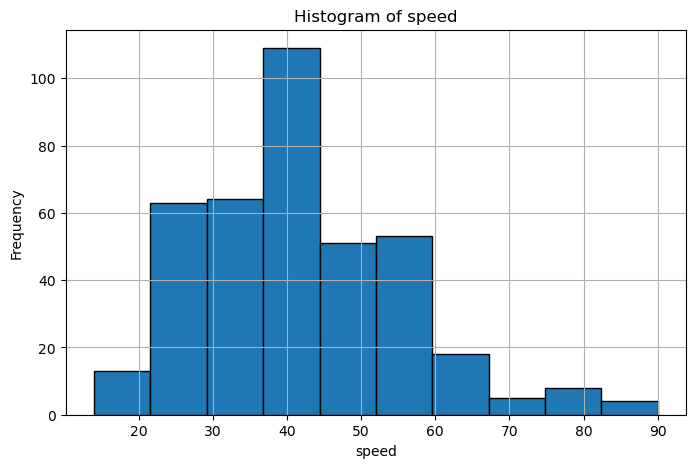

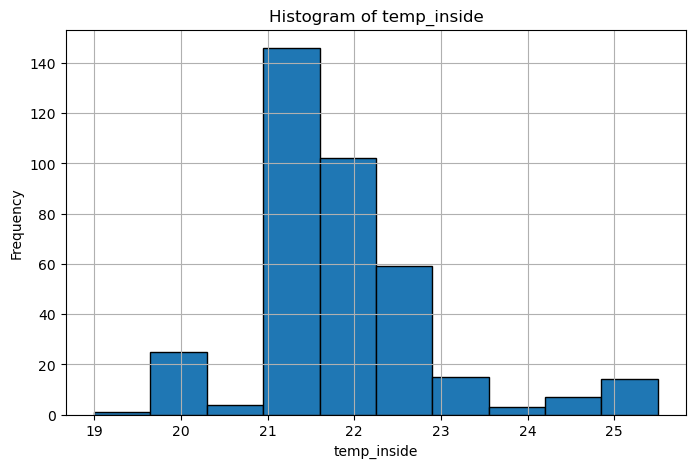

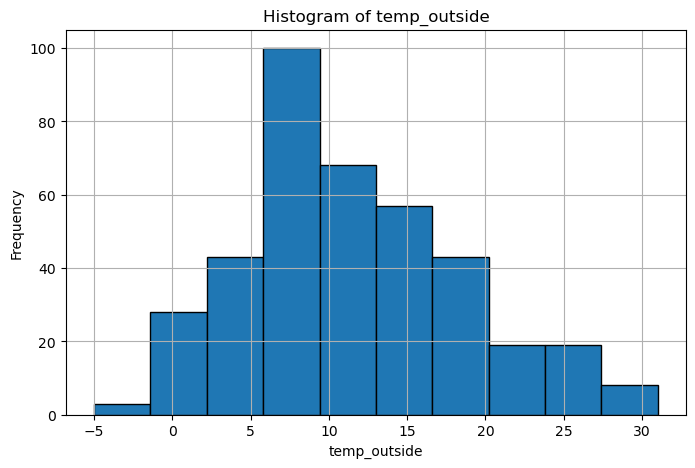

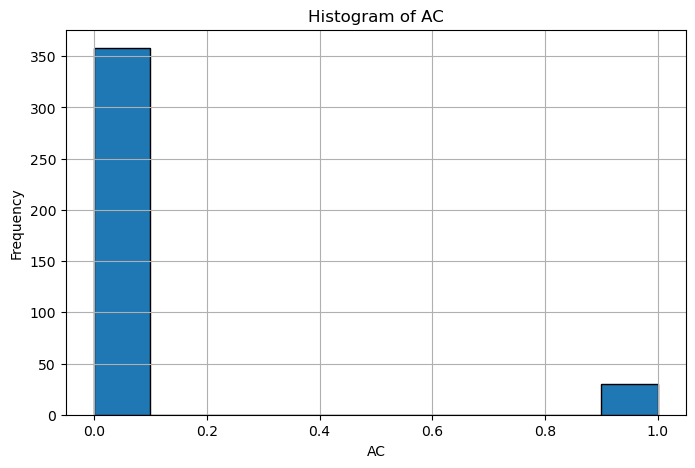

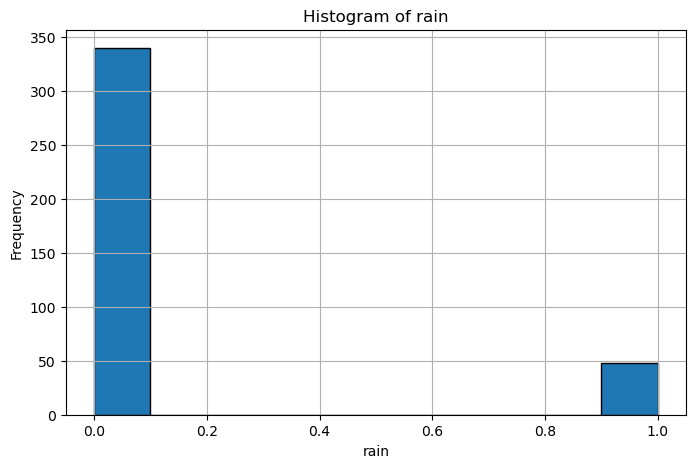

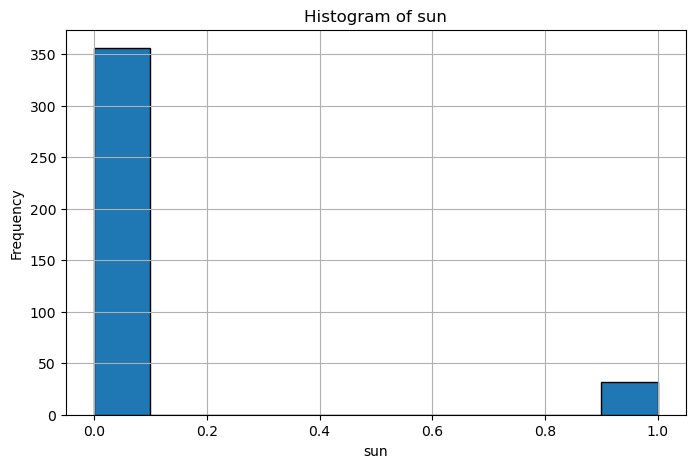

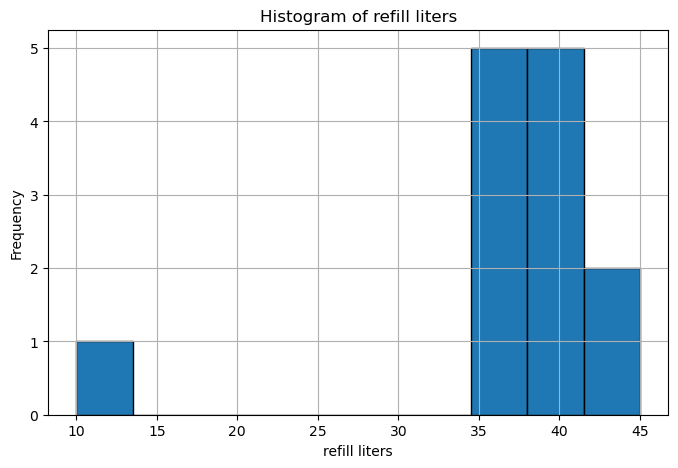

In [44]:
variables = num.columns

for variable in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(num[variable], bins=10, edgecolor='black')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [45]:
correlations = dataset_1A.corr()
correlations

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
distance,1.000000,-0.128967,0.562299,0.074734,0.088175,-0.025738,-0.019791,0.081120,0.031682
consume,-0.128967,1.000000,-0.227866,-0.161470,-0.320811,0.096591,0.248118,-0.170667,0.019709
speed,0.562299,-0.227866,1.000000,0.059139,0.015411,-0.035408,0.009489,0.081618,0.009457
temp_inside,0.074734,-0.161470,0.059139,1.000000,0.359649,0.296719,-0.037204,0.242237,0.006602
temp_outside,0.088175,-0.320811,0.015411,0.359649,1.000000,0.167562,-0.186315,0.346903,-0.005999
AC,-0.025738,0.096591,-0.035408,0.296719,0.167562,1.000000,0.242915,0.088598,0.005650
rain,-0.019791,0.248118,0.009489,-0.037204,-0.186315,0.242915,1.000000,-0.112650,-0.121536
sun,0.081120,-0.170667,0.081618,0.242237,0.346903,0.088598,-0.112650,1.000000,0.005852
refill liters,0.031682,0.019709,0.009457,0.006602,-0.005999,0.005650,-0.121536,0.005852,1.000000


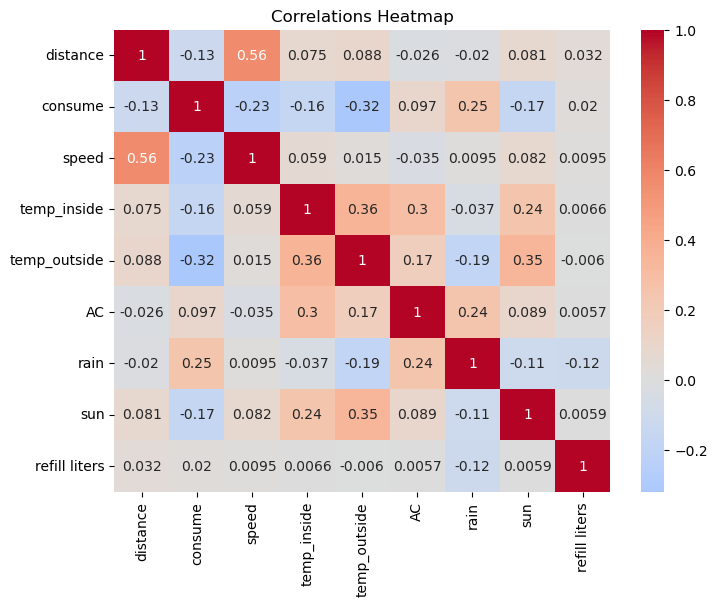

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)

plt.title('Correlations Heatmap')

plt.show()

We see some relationships between temperature-related variables (temperature inside-temperature outside, positive, 0.36); we may also conclude that conditions such as rain and sun also affect temperature (0.24 in the relation between air conditioning, AC, and rain, 0.17 and the relation betweeb AC abd temperature outside, 0.3 in the relation bertween AC and temperature inside); rain conditions also seem to affect consume (positive relation of 0.25). On the contrary, the amount of liters refuelled do not seem to be affected by any of the explanatory variables. 

The above makes sense, taking into account that, in hot conditions you might be driving with the AC on, the hotter, the higher the AC, and the highter the fuel consumption. 

On the other hand, the consumption rate that we are given is the number of liters per 100 kilometers, in order to calculate the total fuel consumption, we will include a new column in the table, "total consumption", which is the result of multiplying the consumption rate times the number of kilometers, divided by 100. We will have a new variable in our dataset, this will be the target. 

In [47]:
dataset_1A['total_consumption'] = (dataset_1A['distance'] * dataset_1A['consume']) / 100
dataset_1A.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,gas_type,total_consumption
0,28.0,5.0,26,21.5,12,0,0,0,45.0,E10,1.4000
1,12.0,4.2,30,21.5,13,0,0,0,38.0,E10,0.5040
2,11.2,5.5,38,21.5,15,0,0,0,38.0,E10,0.6160
3,12.9,3.9,36,21.5,14,0,0,0,38.0,E10,0.5031
4,18.5,4.5,46,21.5,15,0,0,0,38.0,E10,0.8325


In [48]:
dataset_1A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           388 non-null    float64
 1   consume            388 non-null    float64
 2   speed              388 non-null    int64  
 3   temp_inside        388 non-null    float64
 4   temp_outside       388 non-null    int64  
 5   AC                 388 non-null    int64  
 6   rain               388 non-null    int64  
 7   sun                388 non-null    int64  
 8   refill liters      388 non-null    float64
 9   gas_type           388 non-null    object 
 10  total_consumption  388 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 33.5+ KB


dataset_1A = dataset_1A.drop(columns=columns_to_remove, inplace=True)
dataset_1A.head()

# 2. Machine learning model 

The machine learning model that we are going to create will have as target variable the "total_consumption", which is the product of the distance times the consume by 100 kilometers, already calculated in the previous dataset. 

In [53]:
categorical_columns = dataset_1A.select_dtypes(include=['object']).columns
dataset_1A = pd.get_dummies(dataset_1A, columns=categorical_columns, drop_first=True)

X = dataset_1A.drop(columns=['total_consumption'])
y = dataset_1A['total_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.012895220610231878
Root Mean Squared Error: 0.11355712487656544
Mean Absolute Error: 0.058221577789319884
R-squared: 0.9924541713964911


In [55]:
X = dataset_1A.drop(columns=['total_consumption'])
y = dataset_1A['total_consumption']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.012895220610232157
Root Mean Squared Error: 0.11355712487656668
Mean Absolute Error: 0.05822157778932031
R-squared: 0.9924541713964908


In [63]:
# 2.2. Min-max scaler 

In [56]:
X = dataset_1A.drop(columns=['total_consumption'])
y = dataset_1A['total_consumption']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.012895220610232004
Root Mean Squared Error: 0.113557124876566
Mean Absolute Error: 0.058221577789320786
R-squared: 0.992454171396491


In [64]:
# Inter-quartile range (IQR)

In [57]:
Q1 = dataset_1A.quantile(0.25)
Q3 = dataset_1A.quantile(0.75)
IQR = Q3 - Q1
outliers = (dataset_1A < (Q1 - 1.5 * IQR)) | (dataset_1A > (Q3 + 1.5 * IQR))
print(IQR)

distance              7.20000
consume               1.00000
speed                17.25000
temp_inside           1.00000
temp_outside          9.00000
AC                    0.00000
rain                  0.00000
sun                   0.00000
refill liters         0.00000
total_consumption     0.36485
gas_type_SP98         1.00000
dtype: float64


In [58]:
# Outliers representation 

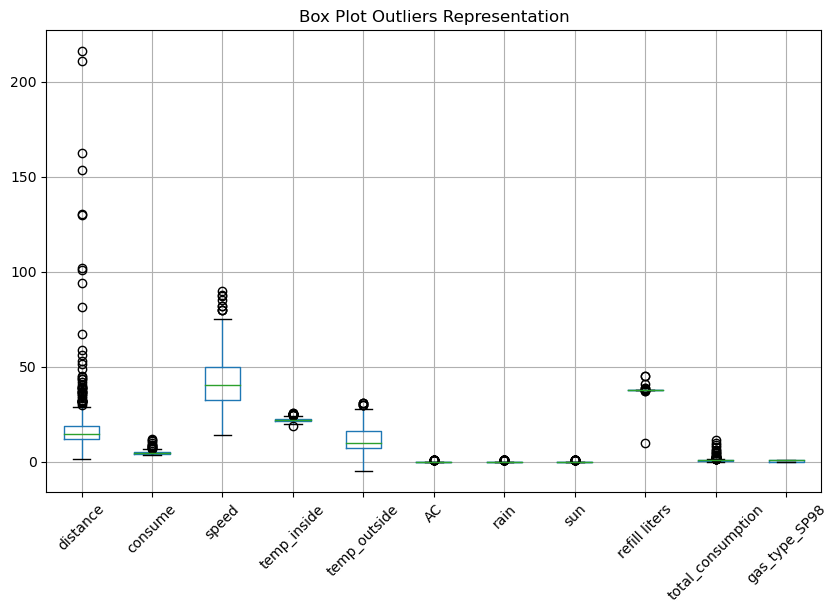

In [59]:
dataset_1A.boxplot(figsize=(10, 6))
plt.title("Box Plot Outliers Representation")
plt.xticks(rotation=45)
plt.show()

# 3. Model performance analysis 

In [60]:
# Feature selection 

In [61]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

         Feature  Importance
0       distance    0.918190
9  gas_type_SP98    0.028510
1        consume    0.025885
4   temp_outside    0.010248
2          speed    0.008613
7            sun    0.003785
8  refill liters    0.002873
3    temp_inside    0.001641
5             AC    0.000216
6           rain    0.000038


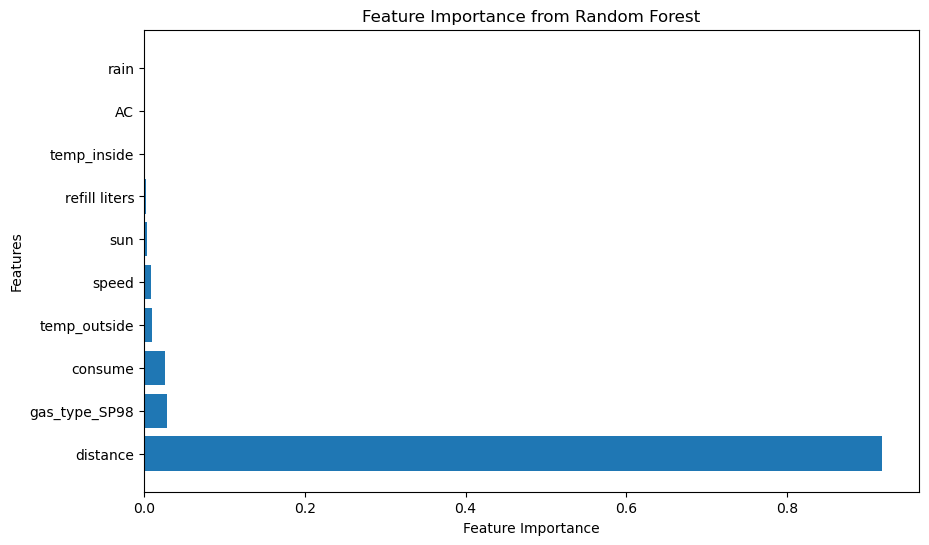

In [62]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

In [63]:
correlation_matrix = dataset_1A.corr()
correlation_with_target = correlation_matrix['total_consumption'].abs().sort_values(ascending=False)
print(correlation_with_target)

total_consumption    1.000000
distance             0.992101
speed                0.551847
sun                  0.064247
temp_inside          0.061849
gas_type_SP98        0.055348
consume              0.052188
refill liters        0.045657
temp_outside         0.037877
AC                   0.018700
rain                 0.009125
Name: total_consumption, dtype: float64


In [64]:
# Hyperparameter tuning 

In [65]:
categorical_columns = dataset_1A.select_dtypes(include=['object']).columns
dataset_1A = pd.get_dummies(dataset_1A, columns=categorical_columns, drop_first=True)

X = dataset_1A.drop(columns=['total_consumption'])
y = dataset_1A['total_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.04258746190532541
Root Mean Squared Error: 0.20636729853667565
Mean Absolute Error: 0.05191385148522663
R-squared: 0.9750793183064221


performance = pd.read_csv('Model performance.csv')
performance.head()

In [73]:
# 4. Hypothesis testing

We want to find if the average speed has been different in cars that used as a gas_type SP98 and E10, assuming a confidence level of 99%. For this, we will perform the analysis of variance (ANOVA), where we will compare the p-value to the signifance level in order to decide whether we keep the null hypothesis of we reject it. 

In [75]:
# grouped values by gas type
gas_groups = [group['speed'] for _, group in dataset_1A.groupby('gas_type_SP98')]

# ANOVA test
statistic, p_value = stats.f_oneway(*gas_groups)
alpha = 0.01  # 99% confidence level

# ANOVA results
print("ANOVA Results:")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance Level (alpha): {alpha:.4f}")

# Hypothesis testing decision 
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

ANOVA Results:
Statistic: 3.6939
P-value: 0.0553
Significance Level (alpha): 0.0100
Fail to reject the null hypothesis


Since the p-value is higher than Alpha, we maintain the null hypothesis that the average speed does not vary from cars with one fuel type to another (SP98 vs. E10). 

In [76]:
# average speed by gas type
average_speed_gas_type = dataset_1A.groupby('gas_type_SP98')['speed'].mean()

# calculated average speeds
print("Average Speed by Gas Type:")
print(average_speed_gas_type)

Average Speed by Gas Type:
gas_type_SP98
0    43.506250
1    40.820175
Name: speed, dtype: float64


In [78]:
#4 Streamlit UI

In [67]:
dataset_1A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           388 non-null    float64
 1   consume            388 non-null    float64
 2   speed              388 non-null    int64  
 3   temp_inside        388 non-null    float64
 4   temp_outside       388 non-null    int64  
 5   AC                 388 non-null    int64  
 6   rain               388 non-null    int64  
 7   sun                388 non-null    int64  
 8   refill liters      388 non-null    float64
 9   total_consumption  388 non-null    float64
 10  gas_type_SP98      388 non-null    uint8  
dtypes: float64(5), int64(5), uint8(1)
memory usage: 30.8 KB


We want a Streamlit user interface that displays the total consumption of fuel depending on the input values that we select for the rest of variables. Note that refill gas_SP98 and gas_type_SP98 are already encoded categoricals which show the values 0 and 1. 

In [71]:
import streamlit as st
import pandas as pd
from sklearn.linear_model import LinearRegression

X = dataset_1A.drop(columns=['total_consumption'])
y = dataset_1A['total_consumption']

model = LinearRegression()

model.fit(X, y)

st.title('Fuel Consumption Prediction')

distance = st.slider('Distance', float(X['distance'].min()), float(X['distance'].max()), float(X['distance'].mean()))
speed = st.slider('Speed', int(X['speed'].min()), int(X['speed'].max()), int(X['speed'].mean()))
temp_inside = st.slider('Inside Temperature', float(X['temp_inside'].min()), float(X['temp_inside'].max()), float(X['temp_inside'].mean()))
temp_outside = st.slider('Outside Temperature', int(X['temp_outside'].min()), int(X['temp_outside'].max()), int(X['temp_outside'].mean()))
AC = st.radio('AC On?', ['No', 'Yes'])  # Reversed order to match 'AC' values in the dataset
rain = st.radio('Rain?', ['No', 'Yes'])  # Reversed order to match 'rain' values in the dataset
sun = st.radio('Sun?', ['No', 'Yes'])  # Reversed order to match 'sun' values in the dataset
refill_liters = st.slider('Refill Liters', float(X['refill liters'].min()), float(X['refill liters'].max()), float(X['refill liters'].mean()))
gas_type_SP98 = st.radio('Gas Type (SP98)?', ['No', 'Yes'])  # Reversed order to match 'gas_type_SP98' values in the dataset

AC = 1 if AC == 'Yes' else 0
rain = 1 if rain == 'Yes' else 0
sun = 1 if sun == 'Yes' else 0
gas_type_SP98 = 1 if gas_type_SP98 == 'Yes' else 0

gas_type_encoded = 1 if gas_type_SP98 else 0
ac_encoded = 1 if AC else 0
rain_encoded = 1 if rain else 0
sun_encoded = 1 if sun else 0

input_data = [[distance, speed, temp_inside, temp_outside, ac_encoded, rain_encoded, sun_encoded, refill_liters, gas_type_encoded]]
predicted_consumption = model.predict(input_data)

st.write(f'Predicted Fuel Consumption: {predicted_consumption[0]:.2f} L/100km')

ValueError: X has 9 features, but LinearRegression is expecting 10 features as input.